In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv('C:\\Users\\Vrinda\\OneDrive\\Desktop\\projects\\100 days\\spam.csv', encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Data Cleaning

In [6]:
#drop las 3 columns as too many null values
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df.rename(columns={'v1':'target', 'v2':'text'} , inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['target'] =encoder.fit_transform(df['target'])

In [10]:
df.sample(10)
#data is cleaned 

,target,text
4931,0,Match started.india &lt;#&gt; for 2
2024,0,U having lunch alone? I now so bored...
4375,1,"If you don't, your prize will go to another cu..."
321,0,Hey... Why dont we just go watch x men and hav...
561,0,Thanx 4 e brownie it's v nice...
1260,0,"Yo, I'm at my parents' gettin cash. Good news:..."
3333,0,"That's fine, have him give me a call if he kno..."
655,0,Tell them the drug dealer's getting impatient
1314,0,Got but got 2 colours lor. One colour is quite...
608,0,Neva mind it's ok..


In [11]:
#check missing values 
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
#check duplicate values
df.duplicated().sum()

403

In [13]:
#remove duplicate values
df = df.drop_duplicates(keep='first')

In [14]:
df.shape

(5169, 2)

### EDA

In [15]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1f488f8a690>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

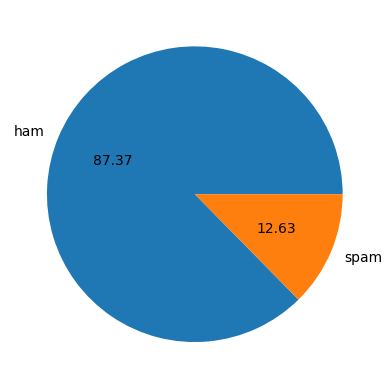

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')

data is imbalanced there is 87% ham data and only 12% spam data

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vrinda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df['characters'] = df['text'].apply(len)   
#find the no. of chracters used in each text

In [20]:
df.head()

,target,text,characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
#no. of words in each text
df['words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,characters,sentences,words
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,0,Ok lar... Joking wif u oni...,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,0,U dun say so early hor... U c already then say...,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15


In [21]:
#no.sentences in each text
df['sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [22]:
df.head()

,target,text,characters,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2
1,0,Ok lar... Joking wif u oni...,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2
3,0,U dun say so early hor... U c already then say...,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1


In [26]:
df[['characters', 'words', 'sentences']].describe()

,characters,words,sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
#check new columns for ham msgs only 
df[df['target'] == 0][['characters', 'words', 'sentences']].describe()

,characters,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#check new columns for spam msgs only   
df[df['target'] == 1][['characters', 'words', 'sentences']].describe()

,characters,words,sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


from obs we can see ham msg has msgs with less char wor and sent len whereas spam has more char, words and sent len

In [29]:
import seaborn as sns

<Axes: xlabel='characters', ylabel='Count'>

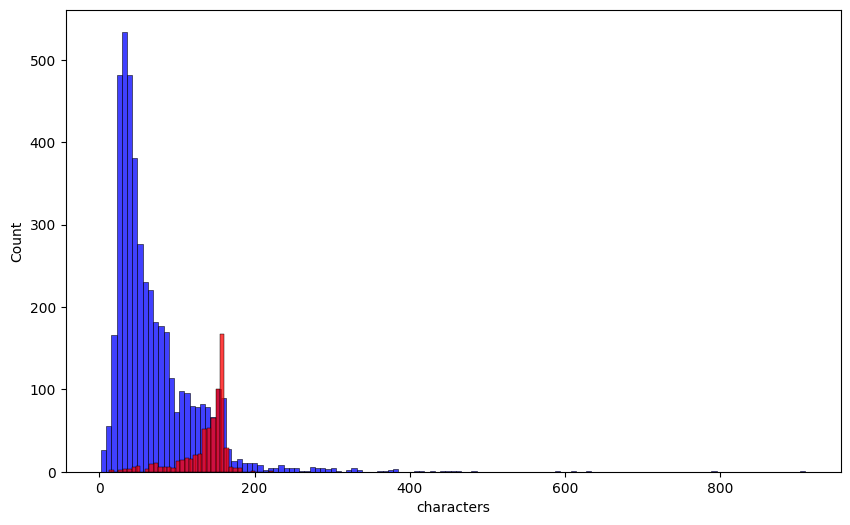

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['target'] == 0]['characters'], color='blue', label='ham')
sns.histplot(df[df['target'] == 1]['characters'], color='red', label='spam')

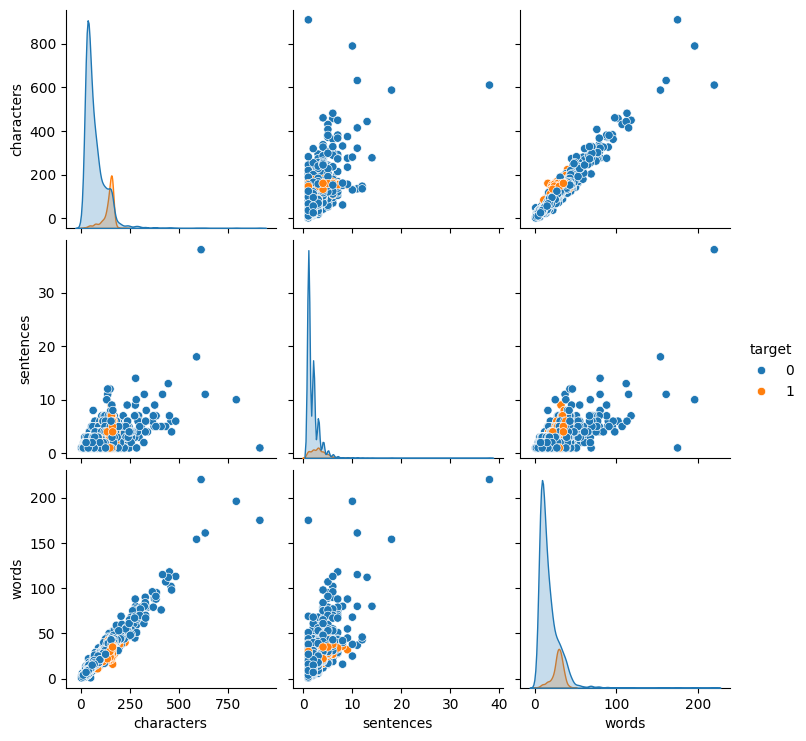

In [34]:
sns.pairplot(df, hue='target')  

the graphs shows that the data has outliers 

In [35]:
df_no = df.drop(columns=['text'])
df_no.head()

,target,characters,sentences,words
0,0,111,2,24
1,0,29,2,8
2,1,155,2,37
3,0,49,1,13
4,0,61,1,15


<Axes: >

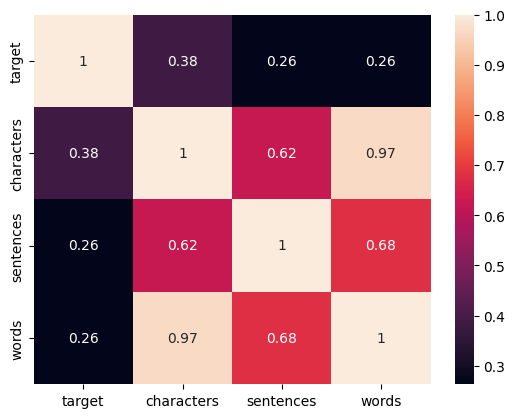

In [36]:
sns.heatmap(df_no.corr(), annot=True)

the characters are most relate dto the target according to the above heat map

In [37]:
df.to_csv('spam_cleaned.csv')

In [38]:
df.head()

,target,text,characters,sentences,words
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,0,Ok lar... Joking wif u oni...,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,0,U dun say so early hor... U c already then say...,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15
